In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [3]:
df = pd.read_csv("cleaned_data.csv")

In [4]:
df.head()

,Judul,Penulis,Tahun
0,mixed reality system pepper ghost system kenda...,"Aristyo Pramana, Eriq Muh. Adams Jonemaro, Wib...",31 Jan 2017
1,penjadwalan mata pelajaran metode tabu searchs...,"Olive Khoirul L.M.A., Agus Wahyu Widodo, Budi ...",31 Jan 2017
2,push notification websocket,"Andrias Yudianto, Eko Sakti Pramukantoro, Kasy...",31 Jan 2017
3,sistem informasi manajemen keluhan pelanggan b...,"Adzanil Rachmadi P, Fatwa Ramdani, Retno Indah...",31 Jan 2017
4,metode store and forward hypertext transfer pr...,"Muhammad Gigih Wicaksono, Aswin Suharsono, Adh...",31 Jan 2017


In [5]:
df.describe()

,Judul,Penulis,Tahun
count,6266,6266,6266
unique,6266,6266,99
top,mixed reality system pepper ghost system kenda...,"Aristyo Pramana, Eriq Muh. Adams Jonemaro, Wib...",30 Nov 2018
freq,1,1,202


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6266 entries, 0 to 6265
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Judul    6266 non-null   object
 1   Penulis  6266 non-null   object
 2   Tahun    6266 non-null   object
dtypes: object(3)
memory usage: 147.0+ KB


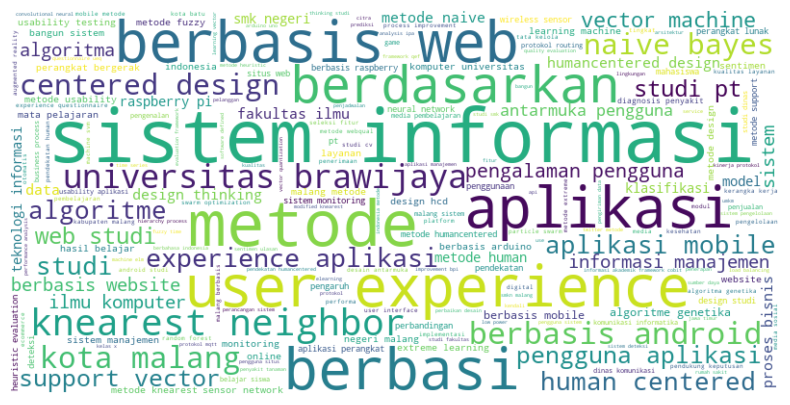

In [7]:
text = " ".join(df["Judul"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [8]:
df['Penulis'] = df['Penulis'].str.split(',') 
df = df.explode('Penulis') 
df['Penulis'] = df['Penulis'].str.strip()
author_counts = df['Penulis'].value_counts().head(10)

In [9]:
unique_authors_count = df['Penulis'].nunique()
print("Jumlah penulis unik:", unique_authors_count)

Jumlah penulis unik: 6683


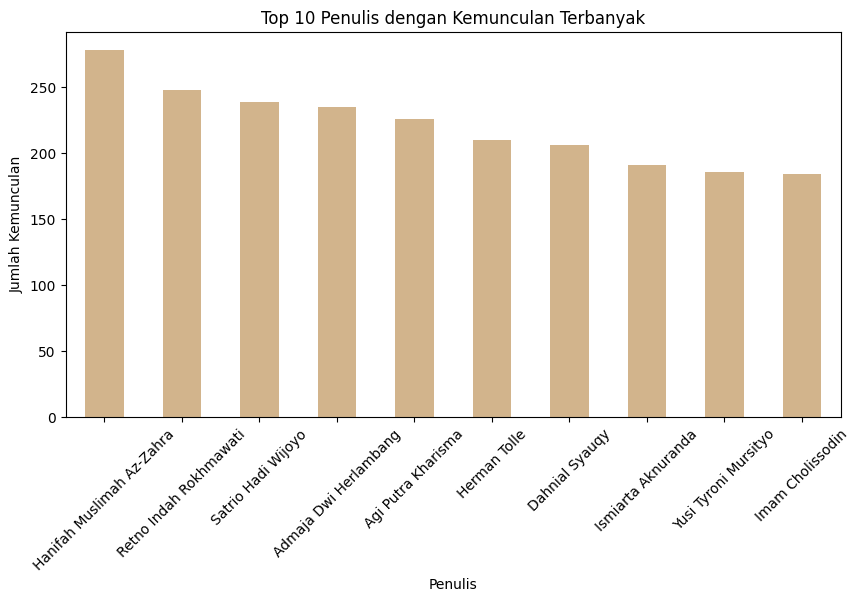

In [12]:
# Plot data
author_counts.plot(kind='bar', figsize=(10,5), color='tan')
plt.xlabel('Penulis')
plt.ylabel('Jumlah Kemunculan')
plt.title('Top 10 Penulis dengan Kemunculan Terbanyak')
plt.xticks(rotation=45)
plt.show()